# Carga y Exploración Inicial de Datos

--- Descripción del dataset: Medical Cost Personal ---

Información general:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None 

Tamaño del dataset: (1338, 7)

Primeras filas del dataset:

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male 

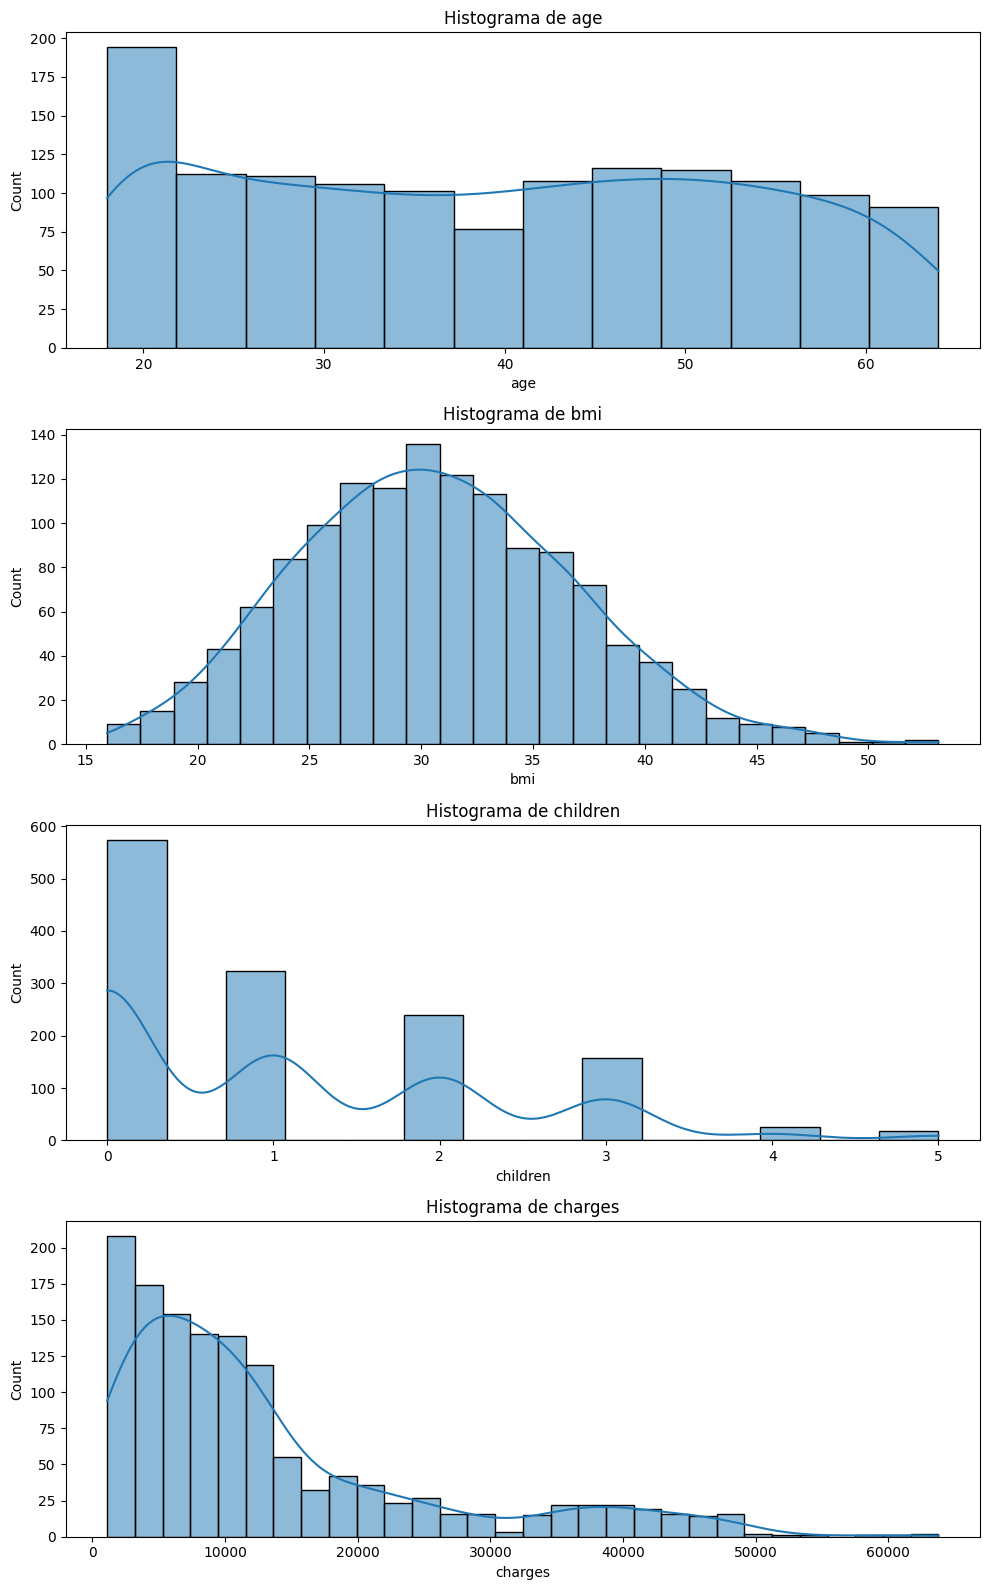

Mapa de calor de correlación entre variables numéricas:



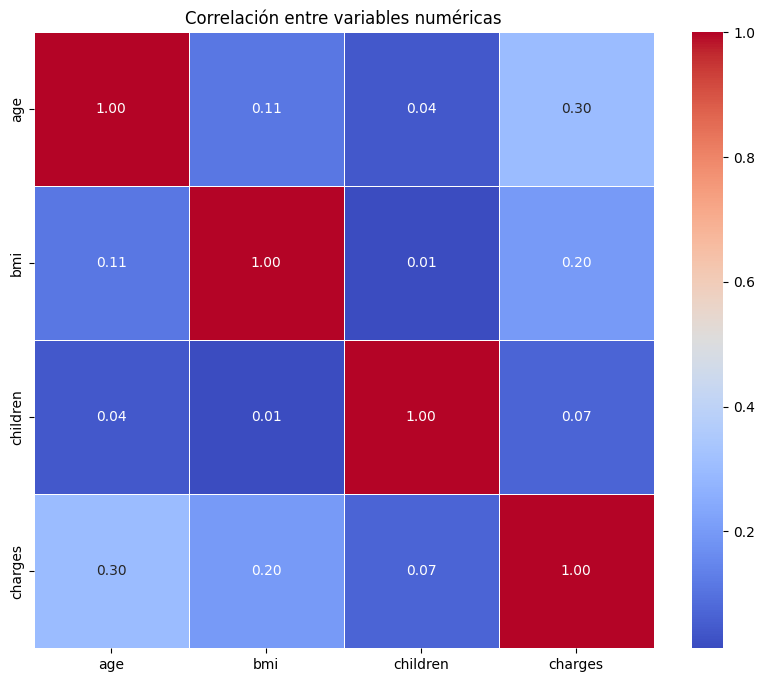

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Función para cargar y describir el conjunto de datos
def describe_dataset(df, name):
    print(f"--- Descripción del dataset: {name} ---\n")

    # Definir columnas numéricas y categóricas
    num_cols = df.select_dtypes(include=[np.number]).columns
    cat_cols = df.select_dtypes(include=['object']).columns

    print("Información general:\n")
    print(df.info(), "\n")

    print(f"Tamaño del dataset: {df.shape}\n")

    print("Primeras filas del dataset:\n")
    print(df.head(), "\n")

    print("Descripción estadística:\n")
    print(df.describe(), "\n")

    print("Variables categóricas:\n")
    for columna in cat_cols:
        print(f"Valores únicos en {columna}:\n")
        print(df[columna].unique(), "\n")

    print("Valores nulos:\n")
    print(df.isnull().sum(), "\n")

    print("Valores duplicados:\n")
    print(df.duplicated().sum(), "\n")

    print("Outliers:\n")
    for columna in num_cols:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers_count = df[(df[columna] < lower_bound) | (df[columna] > upper_bound)].shape[0]
        print(f"Cantidad de outliers en {columna}: {outliers_count}\n")

    # Graficar histogramas para cada columna numérica
    print("Histogramas para variables numéricas:\n")
    plt.figure(figsize=(10, len(num_cols) * 4))
    for i, columna in enumerate(num_cols, 1):
        plt.subplot(len(num_cols), 1, i)
        sns.histplot(data=df, x=columna, kde=True)
        plt.title(f"Histograma de {columna}")
    plt.tight_layout()
    plt.show()

    # Visualizar la correlación entre variables numéricas con un mapa de calor
    print("Mapa de calor de correlación entre variables numéricas:\n")
    correlation_matrix = df[num_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title("Correlación entre variables numéricas")
    plt.show()

# Cargar el dataset y describirlo
df = pd.read_csv('drive/MyDrive/Data_excel/insurance.csv')
describe_dataset(df, 'Medical Cost Personal')

Identificar y documentar los valores faltantes y outliers en el dataset:
- Solo hay un valor duplicado
- Existen outliers mayormente en la columna charges, no veo necesario tratarlos
- No hay valores faltantes


# Preprocesamiento de Datos

In [81]:
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# dividimos las columnas
num_cols = make_column_selector(dtype_include=np.number)
cat_cols = make_column_selector(dtype_exclude=np.number)

# Creamos los pipelines
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore'))

preprocessor = make_column_transformer((num_pipeline, num_cols), (cat_pipeline, cat_cols))

# Implementación de Modelos de Clasificación

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, RocCurveDisplay, auc

# Regresion logistica, KNN, Arbol de decision
# Dividimos
X = df.drop(columns=['smoker'])
y = df['smoker']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5851454)



In [83]:
# pipelines para los modelos
pipeline_lr = make_pipeline(preprocessor, LogisticRegression())
pipeline_knn = make_pipeline(preprocessor, KNeighborsClassifier())
pipeline_dt = make_pipeline(preprocessor, DecisionTreeClassifier())

# Fit
pipeline_lr.fit(X_train, y_train)
pipeline_knn.fit(X_train, y_train)
pipeline_dt.fit(X_train, y_train)

# Predicciones
y_predict_lr = pipeline_lr.predict(X_test)
y_predict_knn = pipeline_knn.predict(X_test)
y_predict_dt = pipeline_dt.predict(X_test)

# Evaluamos
accuracy_lr = accuracy_score(y_test, y_predict_lr)
accuracy_knn = accuracy_score(y_test, y_predict_knn)
accuracy_dt = accuracy_score(y_test, y_predict_dt)

print(f"Accuracy Regresion Logistica: {accuracy_lr}")
print(f"Accuracy KNN: {accuracy_knn}")
print(f"Accuracy Arbol de Decision: {accuracy_dt}")

# Matriz de confusion
matriz_lr = confusion_matrix(y_test, y_predict_lr)
matriz_knn = confusion_matrix(y_test, y_predict_knn)
matriz_dt = confusion_matrix(y_test, y_predict_dt)

print("Matriz de confusion Regresion Logistica:\n", matriz_lr)
print("Matriz de confusion KNN:\n", matriz_knn)
print("Matriz de confusion Arbol de Decision:\n", matriz_dt)

Accuracy Regresion Logistica: 0.9552238805970149
Accuracy KNN: 0.917910447761194
Accuracy Arbol de Decision: 0.9776119402985075
Matriz de confusion Regresion Logistica:
 [[206   8]
 [  4  50]]
Matriz de confusion KNN:
 [[206   8]
 [ 14  40]]
Matriz de confusion Arbol de Decision:
 [[213   1]
 [  5  49]]


# Evaluaciones

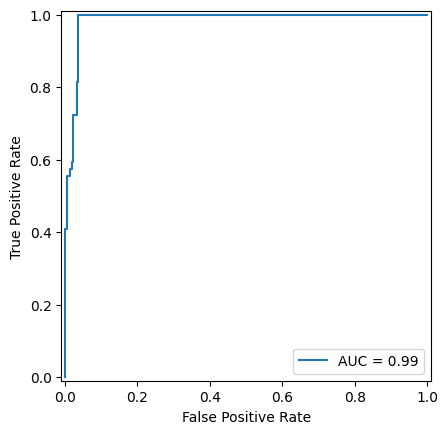

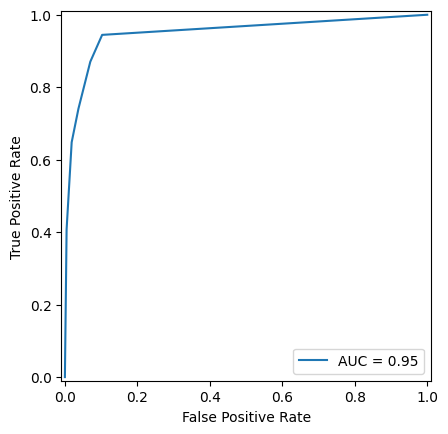

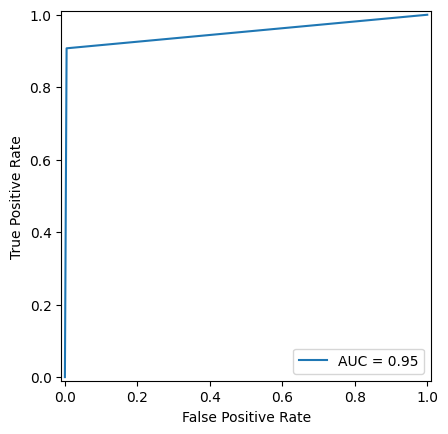

In [85]:
y_test = y_test.map({'yes': 1, 'no': 0})  # Mapeo binario

y_proba_lr = pipeline_lr.predict_proba(X_test)[:, 1]
y_proba_knn = pipeline_knn.predict_proba(X_test)[:, 1]
y_proba_dt = pipeline_dt.predict_proba(X_test)[:, 1]

# Curvas roc
fpr, tpr, thresholds = roc_curve(y_test, y_proba_lr) # Cálculo de las métricas False Positve Rate (fpr) y True Positive Rate (tpr)
roc_auc = auc(fpr, tpr) # Cálculo del área bajo la curva
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc) # Creamos la variable que se encarga del gráfico
display.plot() # Mostramos el gráfico

fpr, tpr, thresholds = roc_curve(y_test, y_proba_knn) # Cálculo de las métricas False Positve Rate (fpr) y True Positive Rate (tpr)
roc_auc = auc(fpr, tpr) # Cálculo del área bajo la curva
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc) # Creamos la variable que se encarga del gráfico
display.plot() # Mostramos el gráfico

fpr, tpr, thresholds = roc_curve(y_test, y_proba_dt) # Cálculo de las métricas False Positve Rate (fpr) y True Positive Rate (tpr)
roc_auc = auc(fpr, tpr) # Cálculo del área bajo la curva
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc) # Creamos la variable que se encarga del gráfico
display.plot() # Mostramos el gráfico

# Validacion Cruzada

In [87]:
from sklearn.model_selection import cross_val_score

# LR
scores_lr = cross_val_score(pipeline_lr, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
print("Logistic Regression:")
print(f"  Exactitud promedio: {scores_lr.mean():.2f}")
print(f"  Desviación estándar: {scores_lr.std():.2f}")

# KNN
scores_knn = cross_val_score(pipeline_knn, X, y, cv=5, scoring='accuracy')
print('KNN')
print(f"  Exactitud promedio: {scores_knn.mean():.2f}")
print(f"  Desviación estándar: {scores_knn.std():.2f}")

# DT
scores_dt = cross_val_score(pipeline_dt, X, y, cv=5, scoring='accuracy')
print('Decision Tree')
print(f"  Exactitud promedio: {scores_dt.mean():.2f}")
print(f"  Desviación estándar: {scores_dt.std():.2f}")


Logistic Regression:
  Exactitud promedio: 0.96
  Desviación estándar: 0.01
KNN
  Exactitud promedio: 0.94
  Desviación estándar: 0.02
Decision Tree
  Exactitud promedio: 0.96
  Desviación estándar: 0.01


# Optimización de Hiperparámetros

In [90]:
from sklearn.model_selection import RandomizedSearchCV

# RandomizerSearchCV
param_dist_lr = {
    'logisticregression__C': np.arange(1, 500),  # Regularización inversa
    'logisticregression__solver': ['liblinear', 'lbfgs'],  # Algoritmos de optimización
}

param_dist_knn = {
    'kneighborsclassifier__n_neighbors': np.arange(1, 15),  # Número de vecinos
    'kneighborsclassifier__weights': ['uniform', 'distance'],  # Peso de los vecinos
}

param_dist_dt = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],  # Función de evaluación
    'decisiontreeclassifier__max_depth': np.arange(1, 30),  # Profundidad máxima
}

# Crear los modelos y realizar RandomizedSearchCV
Randomizer_lr = RandomizedSearchCV(pipeline_lr, param_dist_lr, cv=5, n_iter=10, scoring='accuracy', n_jobs=-1, verbose=1)
Randomizer_lr.fit(X_train, y_train)

Randomizer_knn = RandomizedSearchCV(pipeline_knn, param_dist_knn, cv=5, n_iter=10, scoring='accuracy', n_jobs=-1, verbose=1)
Randomizer_knn.fit(X_train, y_train)

Randomizer_dt = RandomizedSearchCV(pipeline_dt, param_dist_dt, cv=5, n_iter=10, scoring='accuracy', n_jobs=-1, verbose=1)
Randomizer_dt.fit(X_train, y_train)

# Imprimir resultados
print("Mejores parámetros para Regresión Logística:")
print(Randomizer_lr.best_params_)

print("Mejores parámetros para KNN:")
print(Randomizer_knn.best_params_)

print("Mejores parámetros para Árbol de Decisión:")
print(Randomizer_dt.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Mejores parámetros para Regresión Logística:
{'logisticregression__solver': 'lbfgs', 'logisticregression__C': 361}
Mejores parámetros para KNN:
{'kneighborsclassifier__weights': 'distance', 'kneighborsclassifier__n_neighbors': 5}
Mejores parámetros para Árbol de Decisión:
{'decisiontreeclassifier__max_depth': 11, 'decisiontreeclassifier__criterion': 'gini'}


In [92]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'logisticregression__C': np.arange(300, 400),  # Regularización inversa
    'logisticregression__solver': ['liblinear', 'lbfgs']  # Algoritmos de optimización
}

param_grid_knn = {
    'kneighborsclassifier__n_neighbors': np.arange(1, 10),  # Número de vecinos
    'kneighborsclassifier__weights': ['uniform', 'distance']  # Peso de los vecinos
}

param_grid_dt = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],  # Función de evaluación
    'decisiontreeclassifier__max_depth': np.arange(6, 15)  # Profundidad máxima
}

grid_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_lr.fit(X_train, y_train)

grid_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_knn.fit(X_train, y_train)

grid_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_dt.fit(X_train, y_train)

# Imprimir resultados
print("Mejores parámetros para Regresión Logística:")
print(grid_lr.best_params_)

print("Mejores parámetros para KNN:")
print(grid_knn.best_params_)

print("Mejores parámetros para Árbol de Decisión:")
print(grid_dt.best_params_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Mejores parámetros para Regresión Logística:
{'logisticregression__C': 300, 'logisticregression__solver': 'liblinear'}
Mejores parámetros para KNN:
{'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__weights': 'uniform'}
Mejores parámetros para Árbol de Decisión:
{'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 6}


# Evaluacion de modelos

In [94]:
# Modelos Optimizados
pipeline_lr_opt = make_pipeline(preprocessor, LogisticRegression(
    C=300,
    solver='liblinear'
))
pipeline_knn_opt = make_pipeline(preprocessor, KNeighborsClassifier(
    n_neighbors=1,
    weights='uniform'
))
pipeline_dt_opt = make_pipeline(preprocessor, DecisionTreeClassifier(
    criterion='entropy',
    max_depth=6
))

# Fit
pipeline_lr_opt.fit(X_train, y_train)
pipeline_knn_opt.fit(X_train, y_train)
pipeline_dt_opt.fit(X_train, y_train)

# Predicciones
y_predict_lr_opt = pipeline_lr_opt.predict(X_test)
y_predict_knn_opt = pipeline_knn_opt.predict(X_test)
y_predict_dt_opt = pipeline_dt_opt.predict(X_test)

In [108]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop(columns=['smoker'])
y = df['smoker']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5851454)

# Evaluaciones
accuracy_lr = accuracy_score(y_test, y_predict_lr_opt)
accuracy_knn = accuracy_score(y_test, y_predict_knn_opt)
accuracy_dt = accuracy_score(y_test, y_predict_dt_opt)

print(f"Accuracy Regresion Logistica: {accuracy_lr}")
print(f"Accuracy KNN: {accuracy_knn}")
print(f"Accuracy Arbol de Decision: {accuracy_dt}")

# Informes
print('Informe de Clasificación LR:')
print(classification_report(y_test, y_predict_lr_opt))

print('Informe de Clasificación KNN:')
print(classification_report(y_test, y_predict_knn_opt))

print('Informe de Clasificación DT:')
print(classification_report(y_test, y_predict_dt_opt))

# Matriz de Confusión
conf_matrix_lr = confusion_matrix(y_test, y_predict_lr_opt)
print('Matriz de Confusión LR:')
print(conf_matrix_lr)

conf_matrix_knn = confusion_matrix(y_test, y_predict_knn_opt)
print('Matriz de Confusión KNN:')
print(conf_matrix_knn)

conf_matrix_dt = confusion_matrix(y_test, y_predict_dt_opt)
print('Matriz de Confusión DT:')
print(conf_matrix_dt)

Accuracy Regresion Logistica: 0.9514925373134329
Accuracy KNN: 0.917910447761194
Accuracy Arbol de Decision: 0.9701492537313433
Informe de Clasificación LR:
              precision    recall  f1-score   support

          no       0.98      0.96      0.97       214
         yes       0.86      0.91      0.88        54

    accuracy                           0.95       268
   macro avg       0.92      0.94      0.93       268
weighted avg       0.95      0.95      0.95       268

Informe de Clasificación KNN:
              precision    recall  f1-score   support

          no       0.94      0.95      0.95       214
         yes       0.81      0.78      0.79        54

    accuracy                           0.92       268
   macro avg       0.88      0.87      0.87       268
weighted avg       0.92      0.92      0.92       268

Informe de Clasificación DT:
              precision    recall  f1-score   support

          no       0.99      0.97      0.98       214
         yes       0.

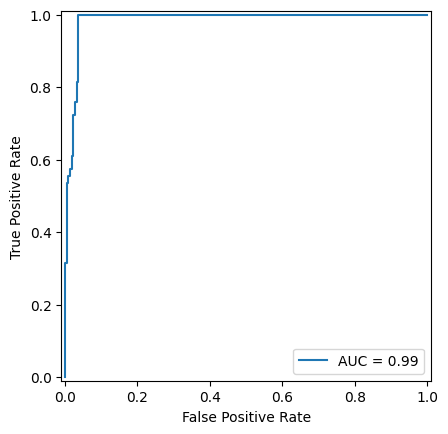

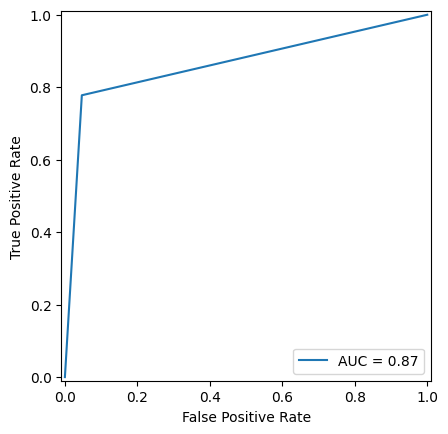

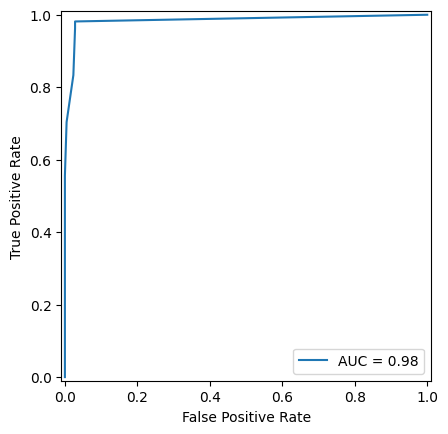

In [110]:
y_proba_lr_opt = pipeline_lr_opt.predict_proba(X_test)[:, 1]
y_proba_knn_opt = pipeline_knn_opt.predict_proba(X_test)[:, 1]
y_proba_dt_opt = pipeline_dt_opt.predict_proba(X_test)[:, 1]

y_test = y_test.map({'yes': 1, 'no': 0})  # Mapeo binario
# Curvas ROC y AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_lr_opt) # Cálculo de las métricas False Positve Rate (fpr) y True Positive Rate (tpr)
roc_auc = auc(fpr, tpr) # Cálculo del área bajo la curva
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc) # Creamos la variable que se encarga del gráfico
display.plot() # Mostramos el gráfico

fpr, tpr, thresholds = roc_curve(y_test, y_proba_knn_opt) # Cálculo de las métricas False Positve Rate (fpr) y True Positive Rate (tpr)
roc_auc = auc(fpr, tpr) # Cálculo del área bajo la curva
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc) # Creamos la variable que se encarga del gráfico
display.plot() # Mostramos el gráfico

fpr, tpr, thresholds = roc_curve(y_test, y_proba_dt_opt) # Cálculo de las métricas False Positve Rate (fpr) y True Positive Rate (tpr)
roc_auc = auc(fpr, tpr) # Cálculo del área bajo la curva
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc) # Creamos la variable que se encarga del gráfico
display.plot() # Mostramos el gráfico